In [12]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime

In [ ]:
SENSOR_NAMES = ['Arkaden', 'FuZo_Eugen-Jaekle-Platz', 'FuZo_Olgastr', 'Brenzstr', 'Knoepfle_Nord', 'Knoepfle_Ost']


In [40]:
def filterDateRange(dataPoint, fromDateString, toDateString):
    fromDate = datetime.strptime(fromDateString, '%Y-%m-%d %H:%M:%S')
    lastDate = datetime.strptime(toDateString, '%Y-%m-%d %H:%M:%S')

    datetimeValue = datetime.strptime(dataPoint['datetime'], '%Y-%m-%d %H:%M:%S')

    return datetimeValue > fromDate and datetimeValue < lastDate

def createAvgValue(dataPoints):
    numberOfValuesToCombine = 3

    maxIndex = len(dataPoints) - numberOfValuesToCombine

    values = []

    for index in range(maxIndex):
        sumVal = 0
        for nThValue in range(numberOfValuesToCombine):
            sumVal += int(dataPoints[index + nThValue]['person.in'])
        
        values.append({
            "datetime": dataPoints[index]['datetime'],
            "value": (sumVal / numberOfValuesToCombine)
        })

    return values

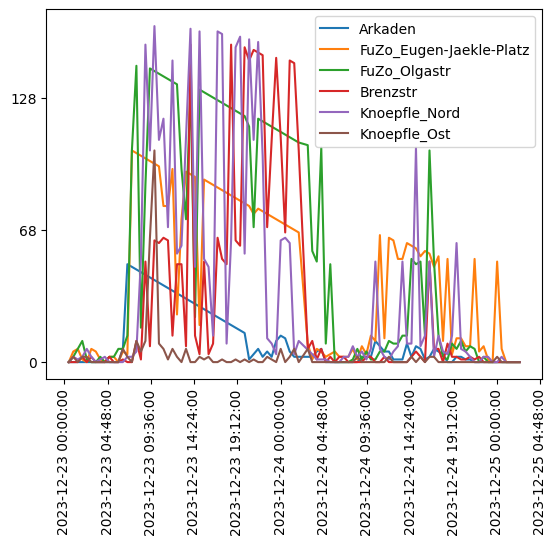

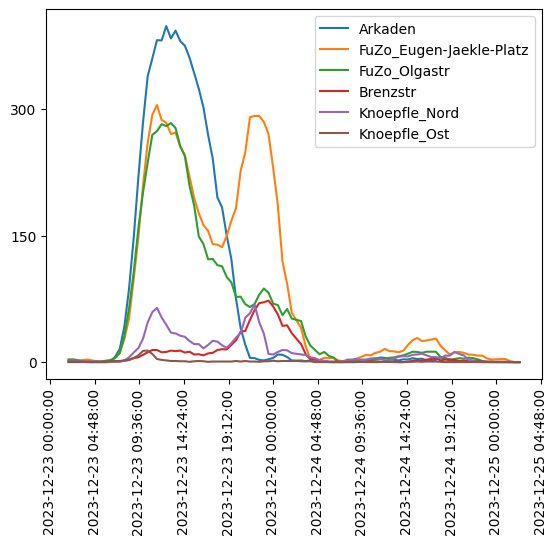

In [41]:


for sensorName in SENSOR_NAMES:    
    
    with open(sensorName + ".json") as jsonFile:
        data = json.load(jsonFile)
        
        dataPoints = list(data['singleDataPoints'].values())
        
        #dataPointsCropped = dataPoints[:220:5]
        dataPointsCropped = [d for d in dataPoints if filterDateRange(d, "2023-12-23 00:00:00", "2023-12-25 03:00:00")]

        x = []
        y = []

        for dataPoint in dataPointsCropped:
            y.append(dataPoint['person.in'])
            datetimeValue = datetime.strptime(dataPoint['datetime'], '%Y-%m-%d %H:%M:%S')
            x.append(datetimeValue)

        plt.plot(x, y, label=sensorName)

leg = plt.legend(loc='upper right')
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)

ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))

plt.xticks(rotation=90)

plt.show()


###########################################################


for sensorName in SENSOR_NAMES:    
    
    with open(sensorName + ".json") as jsonFile:
        data = json.load(jsonFile)
        
        dataPoints = list(data['singleDataPoints'].values())
        
        #dataPointsCropped = dataPoints[:220:5]
        dataPointsCropped = [d for d in dataPoints if filterDateRange(d, "2023-12-23 00:00:00", "2023-12-25 03:00:00")]
        avgValue = createAvgValue(dataPointsCropped)

        x = []
        y = []

        for dataPoint in avgValue:
            y.append(dataPoint['value'])
            datetimeValue = datetime.strptime(dataPoint['datetime'], '%Y-%m-%d %H:%M:%S')
            x.append(datetimeValue)

        plt.plot(x, y, label=sensorName)

leg = plt.legend(loc='upper right')
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)

ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))

plt.xticks(rotation=90)

plt.show()